# Arboles de decisión



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/iris/iris.csv"
df = pd.read_csv(url)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

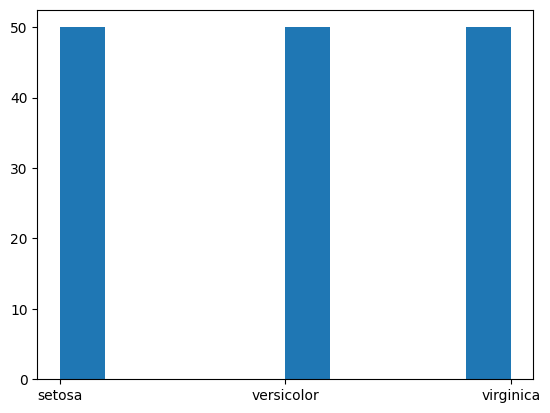

In [ ]:
plt.hist(df.Species)

In [ ]:
columnas = df.columns.values.tolist()
X = df[columnas[:4]]
Y = df[columnas[4]]

(array([ 43.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

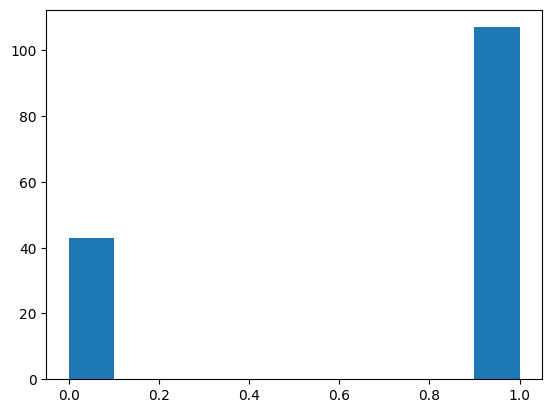

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df['train'] = np.random.uniform(0, 1, len(df)) <= 0.75
plt.hist(df['train'].astype(int))



In [ ]:
train , test = df[df['train'] == True] , df[df['train'] == False]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [ ]:
preds = tree.predict(test[columnas[0:4]])
pd.crosstab(test[columnas[4]], preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,setosa,versicolor,virginica
Actual,,,
setosa,17,0,0
versicolor,0,14,0
virginica,0,0,12


# Visualización Arbol de decisión

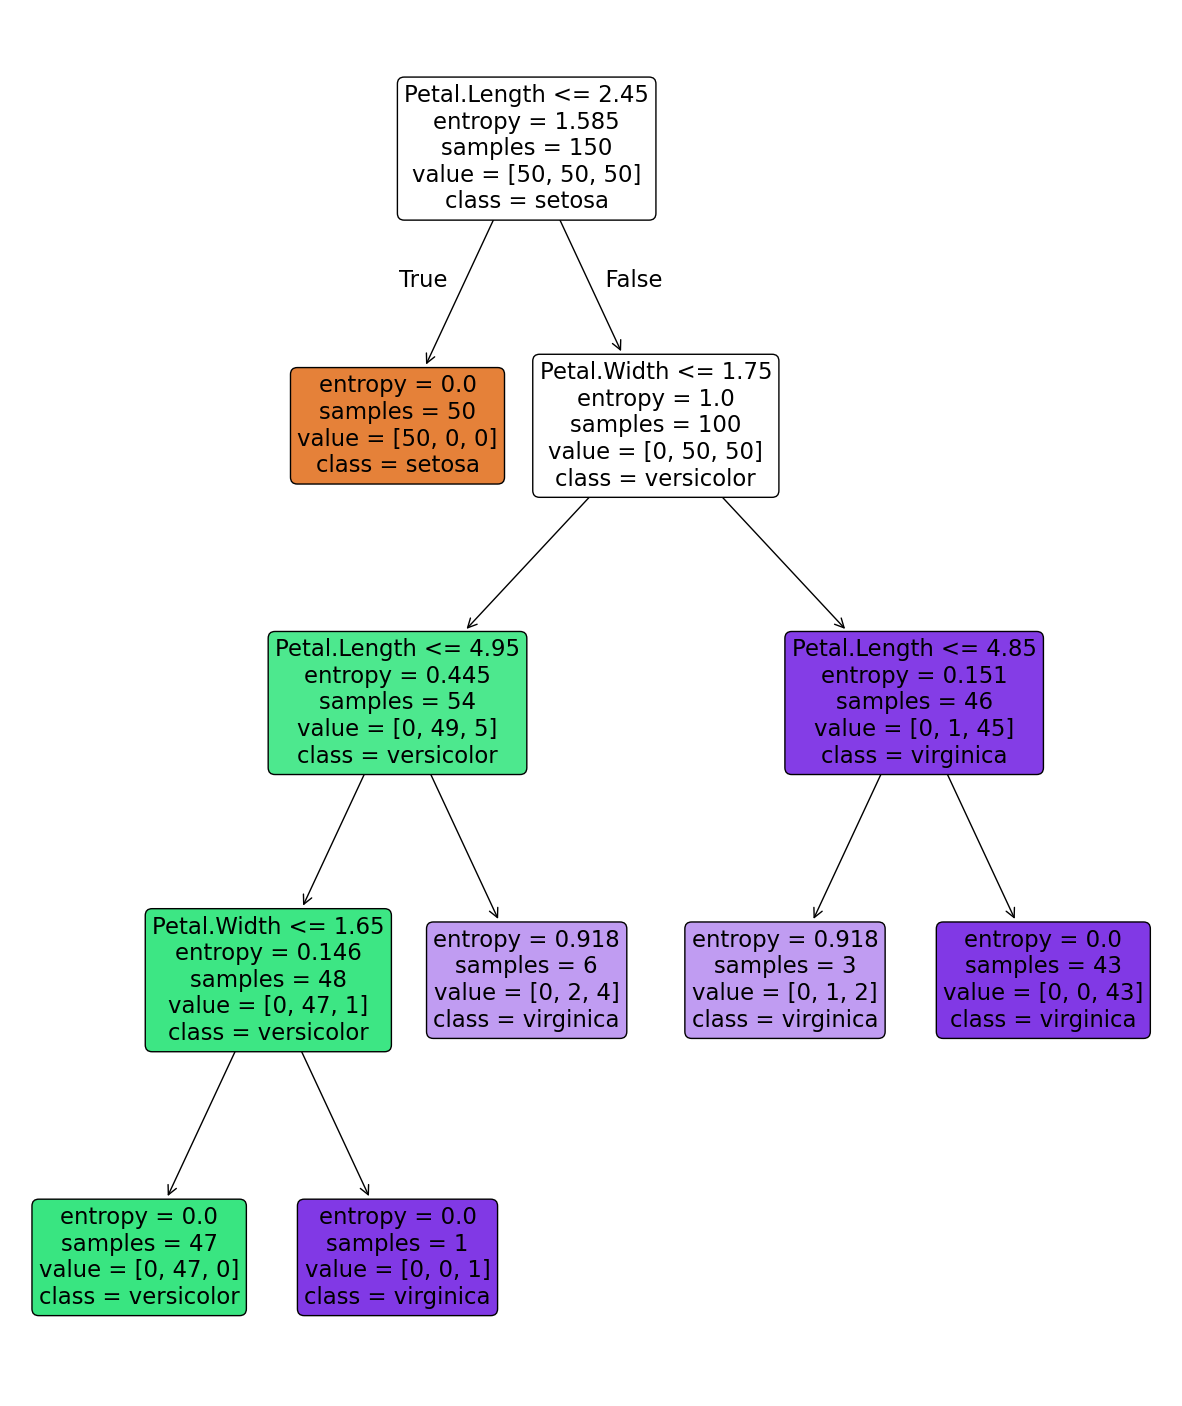

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a plot for the decision tree
plt.figure(figsize=(15, 18))  # Set the size of the plot
plot_tree(tree, filled=True,
          feature_names=df.columns[0:4],  # Assuming df is the DataFrame of features
          class_names=iris.target_names,  # Replace with actual class names
          rounded=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

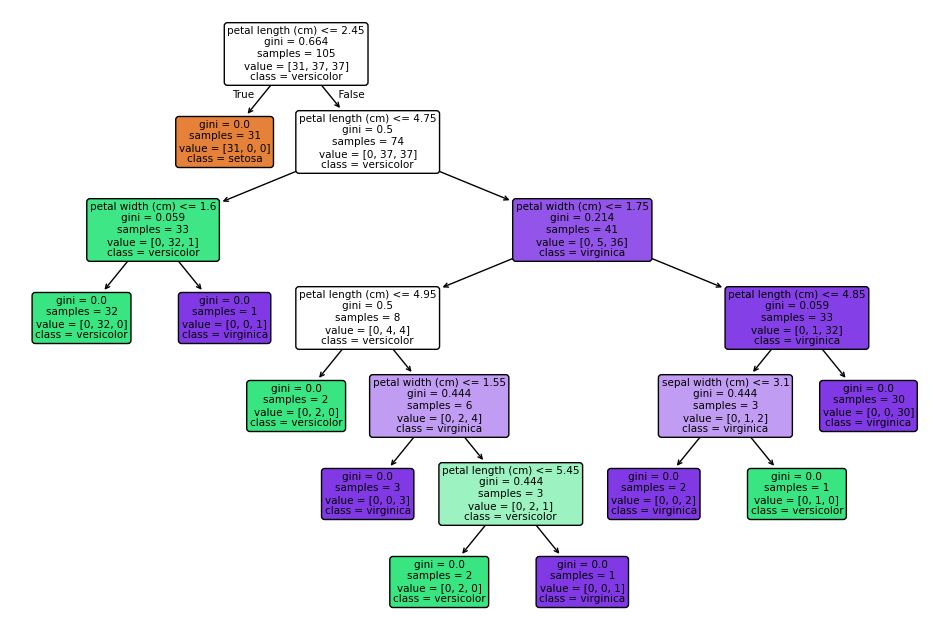

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 8))  # Set the size of the plot
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
# Aplicar validación cruzada con 5 particiones (5-fold cross-validation)
scores = cross_val_score(clf, X, y, cv=5)

# Mostrar los resultados
print("Exactitud en cada fold:", scores)
print("Media de la exactitud:", scores.mean())
print("Desviación estándar:", scores.std())



Exactitud en cada fold: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Media de la exactitud: 0.9533333333333334
Desviación estándar: 0.03399346342395189


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # shuffle para mezclar los datos

In [ ]:
# Crear listas para almacenar los resultados de cada fold
accuracy_scores = []

# Iniciar el bucle de KFold
for train_index, test_index in kf.split(X):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir las etiquetas para el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Evaluar la exactitud
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Mostrar los resultados
print("Exactitud en cada fold:", accuracy_scores)
print("Media de la exactitud:", sum(accuracy_scores) / len(accuracy_scores))
print("Desviación estándar:", np.std(accuracy_scores))


Exactitud en cada fold: [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
Media de la exactitud: 0.9533333333333335
Desviación estándar: 0.02666666666666666


# Arbol de regresión

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url ="https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/boston/Boston.csv"
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
columns = df.columns.values.tolist()
columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [5]:
predictores = columns[:13]
objetivo = columns[13]

In [6]:
X = df[predictores]
Y = df[objetivo]

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [9]:
regtree.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [10]:
preds = regtree.predict(df[predictores])

In [11]:
df['preds'] = preds

In [12]:
df[['preds', 'medv']]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


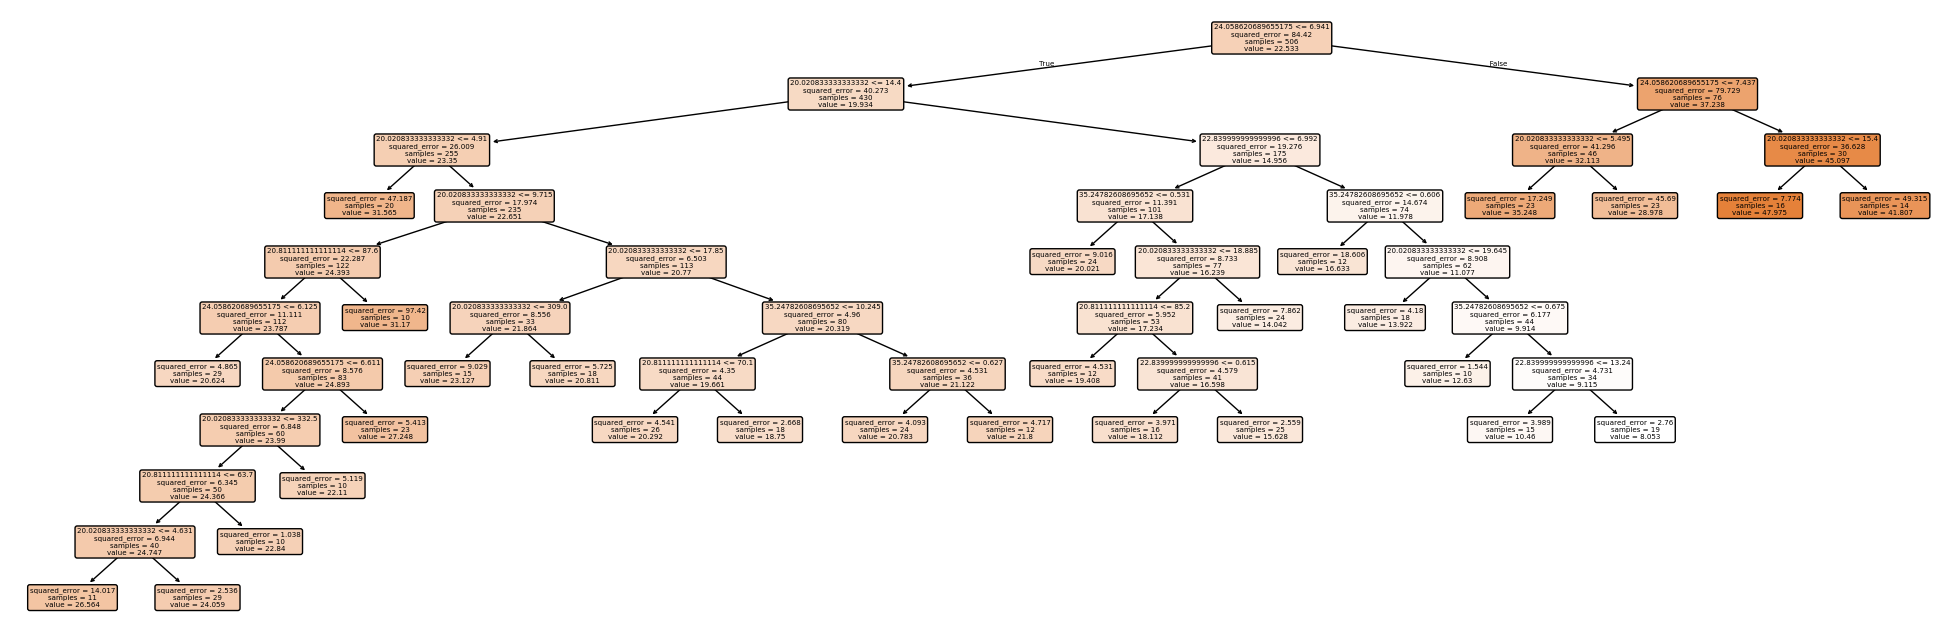

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(25, 8))  # Set the size of the plot
plot_tree(regtree, filled=True, feature_names=df.preds, class_names=Y, rounded=True)
plt.show()

In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)  # shuffle para mezclar los datos

In [25]:

scores = cross_val_score(regtree, X, Y, scoring='neg_mean_squared_error', cv=kf)
scores = np.abs(scores)
print("MSE en cada fold:", scores)
print("Media del MSE:", scores.mean())
print("Desviación estándar:", scores.std())

MSE en cada fold: [11.41710312 20.42379177 15.67286877 19.44653413 31.88399981 27.69375402
 12.93730663 19.59240495 16.69053191 27.84939302]
Media del MSE: 20.360768811894822
Desviación estándar: 6.439030902477912


In [27]:
list(zip(predictores,regtree.feature_importances_))


[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestRegressor(n_jobs=2, oob_score=True)

In [33]:
scoress = cross_val_score(forest, X, Y, scoring='neg_mean_squared_error', cv=kf)
scoress = np.abs(scoress)
print("MSE en cada fold:", scoress)
print("Media del MSE:", scoress.mean())
print("Desviación estándar:", scoress.std())

MSE en cada fold: [ 9.47220218  7.029663    9.71288692  9.23136396 18.0964831  16.13172082
  7.90655364 11.18090028  7.08974536  9.19206652]
Media del MSE: 10.504358578039213
Desviación estándar: 3.539510594560329
